In [1]:
import os
import pandas as pd

## Should return an importance for every feature
And then rerun with correctly selected features

In [2]:
os.chdir('C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators')
data = pd.read_csv("data/out/features.csv")

In [3]:
os.getcwd()
from scripts.churn_functions import out_eval
from sklearn.metrics import mean_squared_error, r2_score
from models.dev.scripts.predict_all import run_predict

In [24]:
run_predict(data = data, split = 141, ahead=6, save = True)

In [4]:
from models.dev.scripts.linear import linear_regression
from models.dev.scripts.tree import decision_tree
from models.dev.scripts.random import random_forest
from models.dev.scripts.arima import arima
from models.dev.scripts.gru import gru
from models.dev.scripts.lstm import lstm

from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

data = pd.read_csv("data/out/features.csv")

split = 141

'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [5]:
l = linear_regression()
l.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

t = decision_tree()
t.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

r = random_forest()
# takes a little bit
r.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

a = arima()
a.fit(data = data, 
      split = split,
      feature_selection = True,
      order=(12, 1, 0)
     )

In [6]:
l.predict(ahead = 6)
t.predict(ahead = 6)
r.predict(ahead = 6)
a.predict(ahead = 6)

Train: 1868.8205124736774 
Test: 981.7846070469396


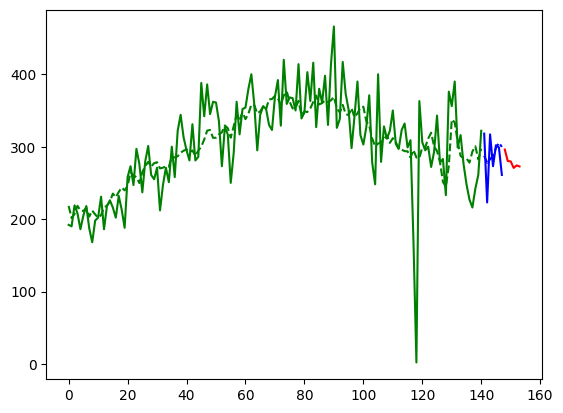

In [12]:
out_eval(l.full, criterion=mean_squared_error, verbose = 2)

Epoch: 0, train loss: 0.33352, test loss: 0.00814
Epoch: 100, train loss: 0.00851, test loss: 0.00522
Epoch: 200, train loss: 0.00659, test loss: 0.01122
Epoch: 300, train loss: 0.00513, test loss: 0.01347
Epoch: 400, train loss: 0.00379, test loss: 0.01155
Epoch: 500, train loss: 0.00266, test loss: 0.01456
Epoch: 600, train loss: 0.00197, test loss: 0.01514
Epoch: 700, train loss: 0.00160, test loss: 0.01590
Epoch: 800, train loss: 0.00115, test loss: 0.01177
Epoch: 900, train loss: 0.00085, test loss: 0.00980
Train: 138.2997519701095 
Test: 1804.6348702012042


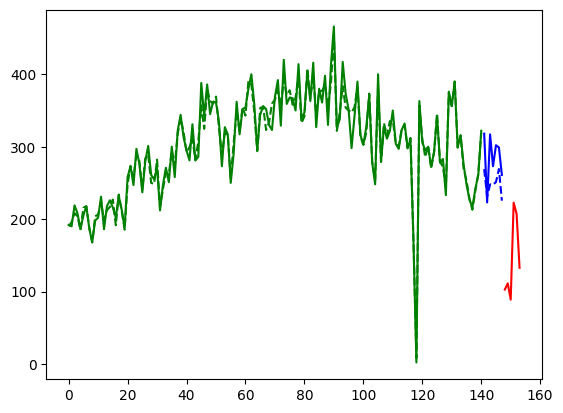

In [13]:
g = gru()
g.fit(data = data, split = split, hidden_size = 32, num_epochs= 1000, verbose = 2)
g.predict(ahead = 6)
out_eval(g.full, criterion=mean_squared_error, verbose = 2)

In [14]:
gimp = g.get_importances(20, names = True)
gimp

array(['AN_lag12', 'g_dealership_near_me_lag9', 'industry_lag9',
       'kwhcost_lag6', 'food_lag12', 'new_units_lag6', 'industryut_lag12',
       'g_car_for_sale_near_me_lag9', 'retail_lag9', 'quarter',
       'carcpi_lag9', 'g_how_to_buy_a_car_lag9', 'F_lag6', 'year',
       '10yinf_lag6', 'stuffcpi_lag9', 'g_cars_for_sale_lag9',
       'XOM_v_lag12', 'industrycg_lag9', 'HMC_v_lag12'], dtype=object)

Epoch: 0, train loss: 0.38035, test loss: 0.29363
Epoch: 20, train loss: 0.02243, test loss: 0.01188
Epoch: 40, train loss: 0.01742, test loss: 0.04507
Epoch: 60, train loss: 0.01512, test loss: 0.03790
Epoch: 80, train loss: 0.01348, test loss: 0.03244
Epoch: 100, train loss: 0.01225, test loss: 0.02956
Epoch: 120, train loss: 0.01139, test loss: 0.02560
Epoch: 140, train loss: 0.01083, test loss: 0.02037
Epoch: 160, train loss: 0.01045, test loss: 0.01566
Epoch: 180, train loss: 0.01014, test loss: 0.01218
Train: 2122.655206089605 
Test: 2122.531692058015


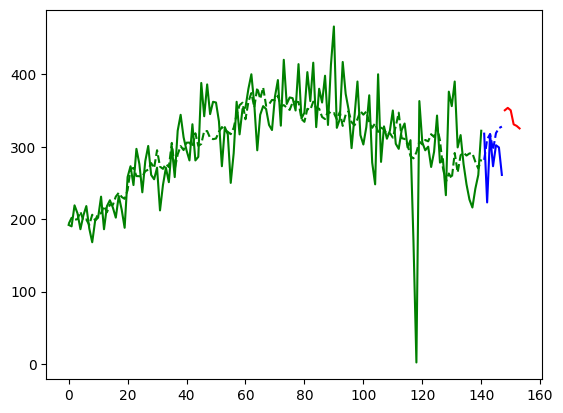

In [15]:
g.fit(data = data, split = split, hidden_size= 16, num_epochs= 200, feature_selection=gimp, verbose = 2)
g.predict(ahead = 6)
out_eval(g.full, criterion=mean_squared_error, verbose = 2)

Epoch: 0, train loss: 0.60143, test loss: 0.37632
Epoch: 10, train loss: 0.07524, test loss: 0.09522
Epoch: 20, train loss: 0.03541, test loss: 0.00502
Epoch: 30, train loss: 0.02335, test loss: 0.03585
Epoch: 40, train loss: 0.01821, test loss: 0.00893
Epoch: 50, train loss: 0.01577, test loss: 0.02586
Epoch: 60, train loss: 0.01449, test loss: 0.01665
Epoch: 70, train loss: 0.01356, test loss: 0.02292
Epoch: 80, train loss: 0.01283, test loss: 0.01831
Epoch: 90, train loss: 0.01221, test loss: 0.01952
Train: 2513.4564255378737 
Test: 3849.2275103948864


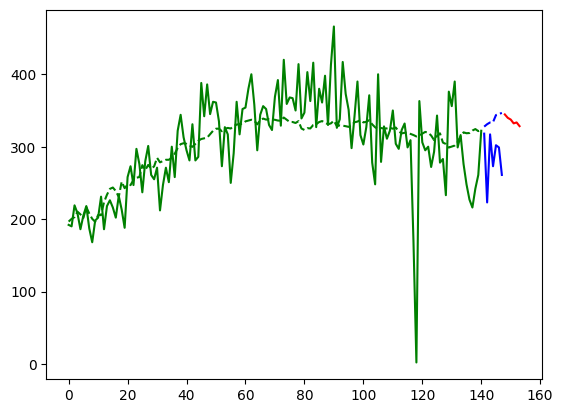

In [16]:
m = lstm()
m.fit(data = data, split = split, hidden_size= 8, num_epochs= 100, verbose = 2)
m.predict(ahead = 6)
out_eval(m.full, criterion=mean_squared_error, verbose = 2)

For a model class, it needs to have 
    - fit method, which will take in most arguments and update model attribute
    - bake method, which will predict and return
    
    - need data attributes, cv attributes, features_in, targetvar, split, features_out, model itself, and out

In [19]:
def expand_grid(splits, eval_scoring):
        aG, bG = np.meshgrid(list(splits), list(eval_scoring)) # create the actual grid
        aG = aG.flatten() # make the grid 1d
        bG = bG.flatten()
        return pd.DataFrame({
            'splits':aG, 
            'eval_scoring':bG})

expand_grid(splits = [(117, 119), (125, 130), (130, 135)], eval_scoring= [mean_squared_error, r2_score])

,splits,eval_scoring
0,117,<function mean_squared_error at 0x000002ADC461...
1,119,<function mean_squared_error at 0x000002ADC461...
2,125,<function mean_squared_error at 0x000002ADC461...
3,130,<function mean_squared_error at 0x000002ADC461...
4,130,<function mean_squared_error at 0x000002ADC461...
5,135,<function mean_squared_error at 0x000002ADC461...
6,117,<function r2_score at 0x000002ADC46196C0>
7,119,<function r2_score at 0x000002ADC46196C0>
8,125,<function r2_score at 0x000002ADC46196C0>
9,130,<function r2_score at 0x000002ADC46196C0>


In [20]:
def train_all(split, criterion):
    from models.dev.prediction.scripts.linear import linear_regression
    from models.dev.prediction.scripts.tree import decision_tree
    from models.dev.prediction.scripts.random import random_forest

    data = pd.read_csv("data/out/features.csv")
    
    # save results to df
    df = pd.DataFrame(columns = ['split',
                         'scoring_method', 
                         'train_score', 
                         'eval_score'])
    
    l = linear_regression()
    t = decision_tree()
    r = random_forest()
    
    l.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    t.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    # takes a little bit
    r.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    l.predict()
    t.predict()
    r.predict()

    # compose df
    df.loc['lm'] = [split, criterion.__name__, out_eval(l.full, criterion)[0], out_eval(l.full, criterion)[1]]

    df.loc['tree'] = [split, criterion.__name__, out_eval(t.full, criterion)[0], out_eval(t.full, criterion)[1]]
    
    df.loc['rf'] = [split, criterion.__name__, out_eval(r.full, criterion)[0], out_eval(r.full, criterion)[1]]

    return df

In [33]:
train_all(split = 117, criterion=mean_squared_error)

,split,scoring_method,train_score,eval_score
lm,117,mean_squared_error,910.776837,6468.894566
tree,117,mean_squared_error,982.942894,6286.495117
rf,117,mean_squared_error,182.112869,5392.636877


In [21]:
full = pd.DataFrame(columns = ['model',
                               'split', 
                                'scoring_method',
                                      'train_score',
                                     'eval_score'])
for i in range(20, 135, 5):
    
    pdf = train_all(split = (i, 135),
                   criterion = mean_squared_error)
    
    pdf.reset_index(inplace=True)
    
    pdf = pdf.rename(columns = {'index':'model'})
    
    full = pd.concat([pdf, full], ignore_index = True)

C:\Users\keato\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+00, tolerance: 1.955e+00
  model = cd_fast.enet_coordinate_descent(


In [92]:
data

,n,10yinf_lag9,AN_lag12,AN_v_lag12,BWA_lag12,BWA_v_lag12,caput_lag9,carcpi_lag12,cbpy30_lag6,discount_lag6,...,treasurymat7_lag6,unemp_lag12,unemp15to26w_lag9,unemp27ov_lag6,unemp5tp14w_lag12,unempt5w_lag12,wagemanuf_lag12,XOM_lag6,XOM_v_lag12,year
0,153,1.36,9.28,44586300,16.88,37820500,63.9471,126.668,6.30,0.18,...,3.14,7.8,2634,4917,3662,3524,18.01,70.39,844182900,2010
1,169,1.57,9.98,46517500,17.25,58747100,63.3721,124.405,6.01,0.17,...,3.21,8.3,3049,5037,3936,3450,18.09,69.15,771508100,2010
2,184,1.86,13.88,72513200,20.30,66080100,63.3134,122.210,5.79,0.12,...,3.02,8.7,3488,5494,4122,3465,18.13,68.61,933460300,2010
3,183,1.74,17.71,76991600,28.95,69088900,64.5022,121.887,5.76,0.07,...,2.96,9.0,2923,5643,4138,3338,18.16,71.67,632859600,2010
4,218,1.82,15.88,72680800,32.25,50958900,65.3611,122.533,5.84,0.05,...,2.92,9.4,2791,5908,4458,3246,18.13,75.07,530458500,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,362,2.36,115.91,24813855,36.83,39222946,79.4102,204.632,5.76,3.72,...,4.09,3.6,734,1169,1630,2242,24.85,110.81,505298620,2023
160,355,2.51,119.56,18384848,40.32,50251387,79.4958,208.447,5.52,4.15,...,3.99,3.6,887,1215,1771,2052,24.96,111.34,659735850,2023
161,380,2.38,111.76,14469223,33.37,43294704,79.5684,209.540,5.01,4.25,...,3.72,3.6,901,1069,1576,2259,25.00,110.30,660321520,2023
162,359,2.39,118.74,15571547,38.46,34231177,79.5555,207.815,4.92,4.54,...,3.59,3.5,817,1111,1769,2086,25.12,116.01,427920540,2023


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables[:-1]])
    return X.iloc[:, variables[:-1]]

In [113]:
# do grouped selection here???? YES

In [118]:
calculate_vif_(X = data.drop("n", axis = 1))

C:\Users\keato\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


dropping 'hcpiurban_lag9' at index: 25
dropping 'treasurymat7_lag6' at index: 50
dropping 'hcpi_lag9' at index: 24
dropping 'year' at index: 57
dropping 'localrent_lag9' at index: 31
dropping 'discount_lag6' at index: 8
dropping 'treasurymat5_lag6' at index: 46
dropping 'wagemanuf_lag12' at index: 51
dropping 'retail_lag9' at index: 38
dropping 'unemp_lag12' at index: 45
dropping 'caput_lag9' at index: 5
dropping 'unemp15to26w_lag9' at index: 44
dropping 'treasurymat1_lag6' at index: 42
dropping 'food_lag12' at index: 11
dropping 'unemp27ov_lag6' at index: 42
dropping 'stuffcpi_lag12' at index: 37
dropping 'g_dealership_near_me_lag12' at index: 14
dropping 'cbpy30_lag6' at index: 6
dropping 'kwhcost_lag6' at index: 24
dropping 'prodmanuf_lag9' at index: 31
dropping 'AN_lag12' at index: 1
dropping 'quarter' at index: 30
dropping 'tmaturity_lag12' at index: 33
dropping 'laborpart_lag9' at index: 23
dropping 'g_dealerships_near_me_lag12' at index: 12
dropping 'industry_lag9' at index: 19


,10yinf_lag9,AN_v_lag12,BWA_v_lag12,F_v_lag12,fedfundseff_lag6,fedsurplus_lag6,g_best_new_cars_lag9,g_cars_for_sale_lag12,g_how_to_buy_a_car_lag12,g_new_cars_lag9,...,industryut_lag6,month,newhouses_lag12,ngspot_lag12,TM_v_lag12,treasurymat10_lag6,unemp5tp14w_lag12,unempt5w_lag12,XOM_lag6,XOM_v_lag12
0,1.36,44586300,37820500,1017368400,0.16,-180680.000000,32,62,19,59,...,102.6101,1,12.2,5.24,22854200,3.56,3662,3524,70.39,844182900
1,1.57,46517500,58747100,574172400,0.16,-103555.000000,0,64,41,79,...,104.4211,2,10.5,4.52,23065500,3.59,3936,3450,69.15,771508100
2,1.86,72513200,66080100,963893100,0.15,-45207.000000,0,48,43,96,...,93.6745,3,11.0,3.96,24879800,3.40,4122,3465,68.61,933460300
3,1.74,76991600,69088900,2468701200,0.12,-176363.000000,35,53,27,94,...,88.0479,4,10.7,3.50,24572300,3.39,4138,3338,71.67,632859600
4,1.82,72680800,50958900,2367699800,0.12,-120287.000000,63,64,25,100,...,88.1245,5,9.3,3.83,17244500,3.40,4458,3246,75.07,530458500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2.36,24813855,39222946,1338949626,3.08,-87797.836311,35,80,100,59,...,91.1027,4,8.5,6.60,4952574,3.98,1630,2242,110.81,505298620
160,2.51,18384848,50251387,1359365004,3.78,-248534.880653,52,73,76,83,...,100.1500,5,8.3,8.14,6259684,3.89,1771,2052,111.34,659735850
161,2.38,14469223,43294704,1143903229,4.10,-85000.736578,42,66,71,77,...,119.2465,6,9.5,7.70,4708805,3.62,1576,2259,110.30,660321520
162,2.39,15571547,34231177,1247848605,4.33,-38783.771839,16,66,55,70,...,116.0802,7,10.1,7.28,3926911,3.53,1769,2086,116.01,427920540
